<a href="https://colab.research.google.com/github/lightucha/how-to-opencv/blob/main/opencv_210825.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 패캠 openCV ch01~02 Review 

- opencv 공식 문서: https://docs.opencv.org/master/
- 동영상, 키보드, 마우스 이벤트, 트랙바 등은 프로젝트 활용되지 않을 것 같아 제외 (상세 내용은 ch02 자료 참고)

### 영상 파일 입출력

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print(cv2.__version__)

4.1.2


In [ ]:
gpath = '/content/drive/MyDrive/1.Project/{PATH}/'

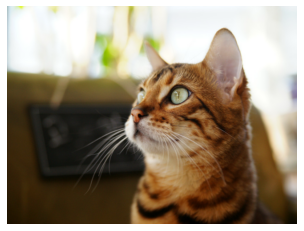

In [ ]:
# img 입출력
img = cv2.imread(gpath + "cat.bmp")
imgColor = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(imgColor)
plt.show()

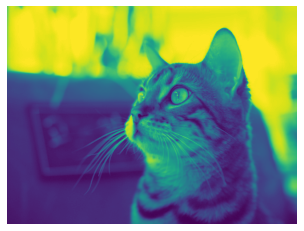

In [ ]:
# color img 를 grey로 변환
imgGray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.axis('off')
plt.imshow(imgGray)
plt.show()

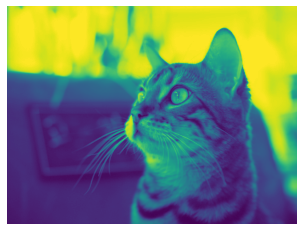

In [ ]:
# img 입출력 시 grey로
imgGray2 = cv2.imread(gpath + "cat.bmp", cv2.IMREAD_GRAYSCALE)

plt.axis('off')
plt.imshow(imgGray2)
plt.show()

In [ ]:
# 파일 저장하기
cv2.imwrite(gpath + 'catGray.jpeg', imgGray, [cv2.IMWRITE_JPEG_QUALITY, 90])

True

영상 파일 형식 특징

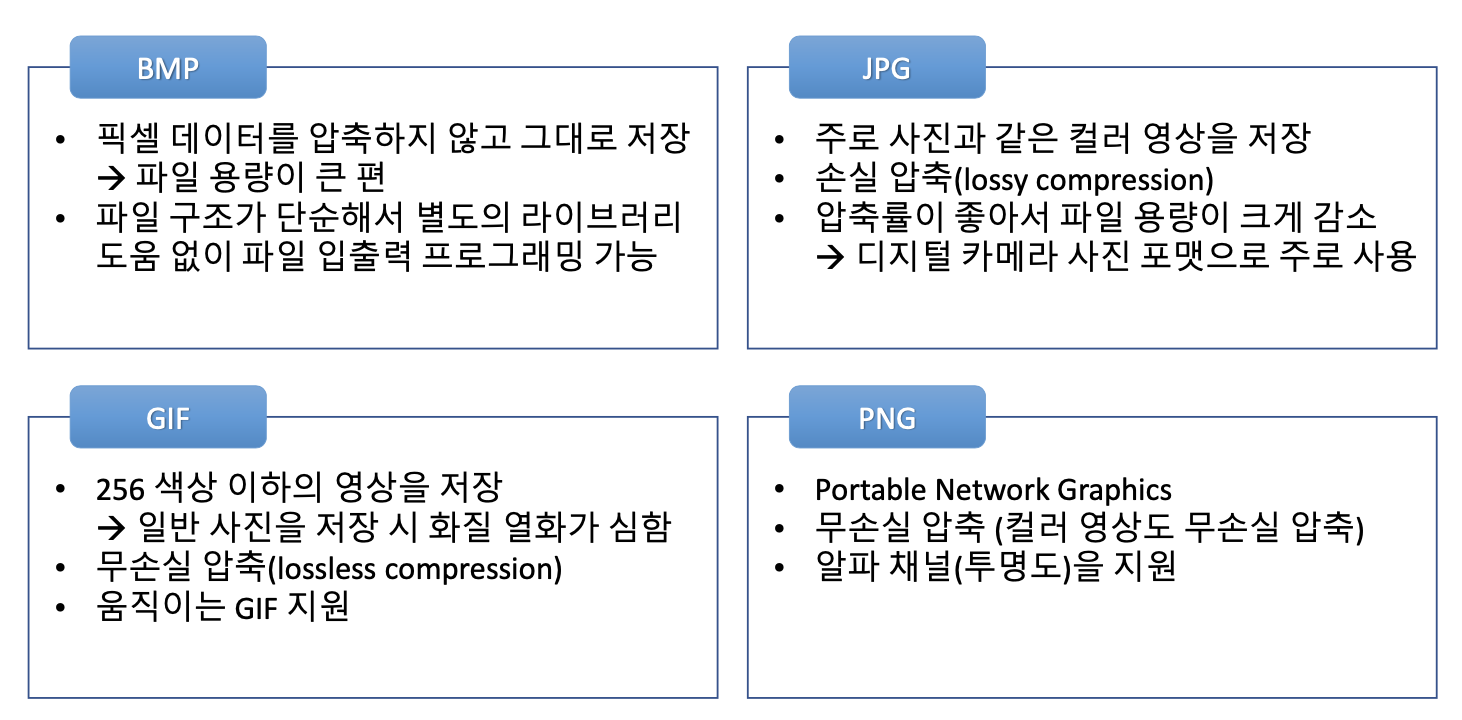

기타 출력 관련 API
 </p>
1. _cv2.namedWindow('image')_: image라는 window 생성 </p>
2. _cv2.imshow('image', img)_: window에 img 출력  </p>
3. _cv2.waitKey()_: keyboard 입력 대기 </p>
 - 특정 키 지정 가능: ESC(27), ENTER(13), TAB(9)
4. _cv2.destroyAllWindows()_: 생성된 window 모두 종료 </p>
4-1. _cv2.destroyWindow_: 지정 window 창 하나만 종료 </p>
5. _cv2.moveWinodw(winname, x, y)_: 창 위치를 지정 좌료(x, y)로 이동

### Matplotlib 이용 영상 출력

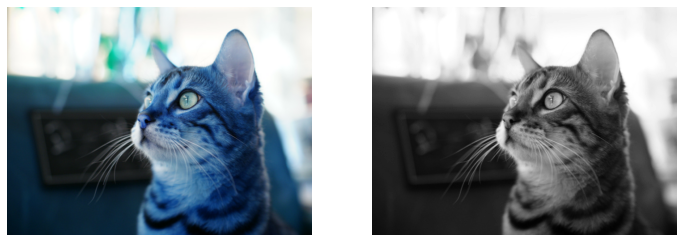

In [ ]:
# 두 개의 영상을 함께 출력
plt.figure(figsize=(12,8))

plt.subplot(121)
plt.axis('off')
plt.imshow(img)

plt.subplot(122)
plt.axis('off')
plt.imshow(imgGray, cmap='gray')
plt.show()

### 영상의 속성과 픽셀

In [ ]:
# opencv는 영상 데이터를 numpy.ndarray로 표현
img1 = cv2.imread(gpath+'cat.bmp', cv2.IMREAD_GRAYSCALE) 
img2 = cv2.imread(gpath+'cat.bmp', cv2.IMREAD_COLOR)

print('type(img1):', type(img1)) # type(img1): <class 'numpy.ndarray'> 
print('img1.shape:', img1.shape) # img1.shape: (480, 640) 
print('img2.shape:', img2.shape) # img2.shape: (480, 640, 3) 
print('img2.dtype:', img2.dtype) # img2.dtype: uint8

print('======================')
h, w = img2.shape[:2] # h: 480, w: 640 print('img2 size: {} x {}'.format(w, h))

if len(img1.shape) == 2:
  print('img1 is a grayscale image')
elif len(img1.shape) == 3: 
  print('img1 is a truecolor image')
 

type(img1): <class 'numpy.ndarray'>
img1.shape: (480, 640)
img2.shape: (480, 640, 3)
img2.dtype: uint8
img1 is a grayscale image


In [ ]:
# 일반적인 영상 unit8 (0~255)
print('dtype(img1):', img1.dtype)
print('dtype(img2):', img2.dtype)

dtype(img1): uint8
dtype(img2): uint8


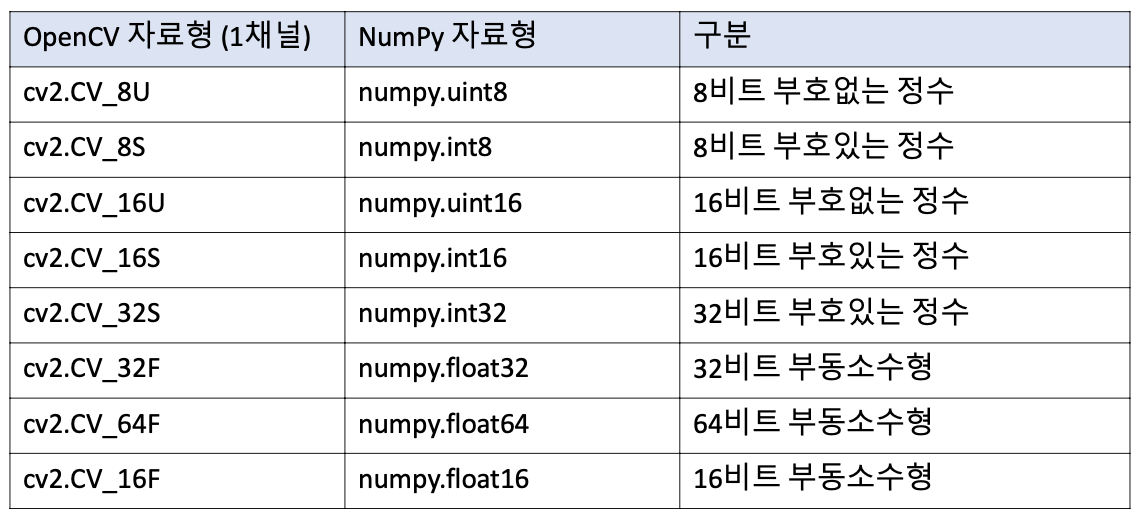

### 영상 생성, 복사, 부분 추출

In [ ]:
ex1 = np.empty((240, 320), dtype=np.uint8)       # grayscale image
ex2 = np.zeros((240, 320, 3), dtype=np.uint8)    # color image
ex3 = np.ones((240, 320), dtype=np.uint8) * 255  # dark gray
ex4 = np.full((240, 320, 3), (255, 255, 0), dtype=np.uint8)  # yellow

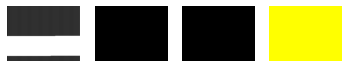

In [ ]:
# 여러 개의 영상을 함께 출력
plt.figure()

plt.subplot(141)
plt.axis('off')
plt.imshow(ex1, cmap='gray')

plt.subplot(142)
plt.axis('off')
plt.imshow(ex2, cmap='gray')

plt.subplot(143)
plt.axis('off')
plt.imshow(ex3, cmap='gray')

plt.subplot(144)
plt.axis('off')
plt.imshow(ex4, cmap='gray')

plt.show()

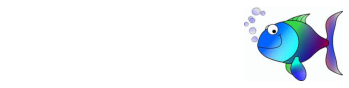

In [ ]:
# 영상의 복사 주의사항
img1 = cv2.imread(gpath + 'ch02/HappyFish.jpg')

img2 = img1 
img3 = img1.copy()

img1.fill(255)

# 결과 출력
plt.figure()

plt.subplot(131)
plt.axis('off')
plt.imshow(img1, cmap='gray')

plt.subplot(132)
plt.axis('off')
plt.imshow(img2, cmap='gray')

plt.subplot(133)
plt.axis('off')
plt.imshow(img3, cmap='gray')

In [ ]:
print('id(img1): ',id(img1)); print('id(img2): ',id(img2)); print('id(img3): ',id(img3))

id(img1):  140706093565232
id(img2):  140706093565232
id(img3):  140706094339616


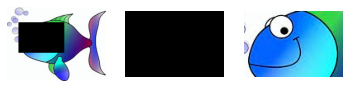

In [ ]:
# 부분 영상 추출
img1 = cv2.imread(gpath + 'ch02/HappyFish.jpg')
img2 = img1[40:120, 30:150] # 특정 부분 슬라이싱
img3 = img1[40:120, 30:150].copy() 
img2.fill(0)

# 결과 출력
plt.figure()

plt.subplot(131)
plt.axis('off')
plt.imshow(img1, cmap='gray')

plt.subplot(132)
plt.axis('off')
plt.imshow(img2, cmap='gray')

plt.subplot(133)
plt.axis('off')
plt.imshow(img3, cmap='gray')

### 마스크 연산과 ROI
- ROI: Region of Interest, 연산을 수행하고자 하는 임의 부분 영역
- 마스크(mask): 영상을 덮을 수 있는 사각형 또는 원형의 window로 영상의 일부분을 한정하여 영역을 설정
 - 주로 필터링(filtering)에서 많이 사용
 - 마스크의 크기가 커질수록 효과가 커지지만 연산 속도는 느려짐

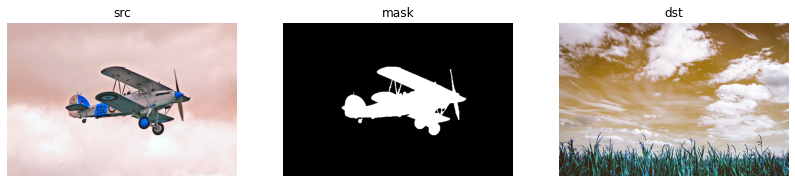

In [ ]:
src = cv2.imread(gpath + 'ch02/airplane.bmp', cv2.IMREAD_COLOR)
mask = cv2.imread(gpath + 'ch02/mask_plane.bmp', cv2.IMREAD_GRAYSCALE) 
dst = cv2.imread(gpath + 'ch02/field.bmp', cv2.IMREAD_COLOR)
# src와 dst는 동일 타입
# mask는 grayscale
# src, mask, dst는 크기가 모두 동일해야 함

# 결과 출력
plt.figure(figsize=(14,10))

plt.subplot(131)
plt.axis('off')
plt.title('src')
plt.imshow(src, cmap='gray')

plt.subplot(132)
plt.axis('off')
plt.title('mask')
plt.imshow(mask, cmap='gray')

plt.subplot(133)
plt.axis('off')
plt.title('dst')
plt.imshow(dst, cmap='gray')

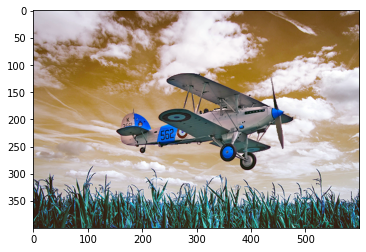

In [ ]:
target = cv2.copyTo(src, mask, dst)
dst[mask > 0] = src[mask>0]

plt.imshow(target)
plt.show()

### 그리기 함수
- 선, 도형, 문자열 등 출력

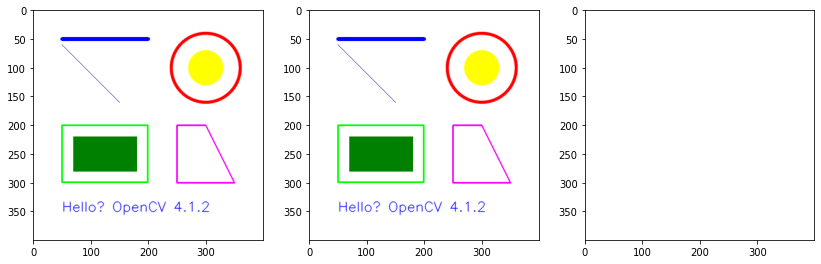

In [ ]:
img = np.full((400, 400, 3), 255, np.uint8)
img1 = img
img2 = img.copy()

cv2.line(img, (50, 50), (200, 50), (0, 0, 255), 5)
cv2.line(img, (50, 60), (150, 160), (0, 0, 128)) 

cv2.rectangle(img, (50, 200, 150, 100), (0, 255, 0), 2)
cv2.rectangle(img, (70, 220), (180, 280), (0, 128, 0), -1) 

cv2.circle(img, (300, 100), 60, (255, 0, 0), 3, cv2.LINE_AA)
cv2.circle(img, (300, 100), 30, (255, 255, 0), -1, cv2.LINE_AA) 

pts = np.array([[250, 200], [300, 200], [350, 300], [250, 300]])
cv2.polylines(img, [pts], True, (255, 0, 255), 2)

text = 'Hello? OpenCV ' + cv2.__version__
cv2.putText(img, text, (50, 350), cv2.FONT_HERSHEY_SIMPLEX, 
            0.8, (0, 0, 255), 1, cv2.LINE_AA)

# 주의 사항
# 그리기는 영상의 픽셀 값 자체를 변경
# 필요 시 복사본 만들어서 그려야 함
plt.figure(figsize=(14, 10))

plt.subplot(131)
plt.imshow(img, cmap='gray') # 원본

plt.subplot(132)
plt.imshow(img1, cmap='gray') # 원본 copy

plt.subplot(133)
plt.imshow(img2, cmap='gray') # 원본 deep copy 해둔 것

plt.show()

### 연산 시간 측정

In [ ]:
# TickMeter 이용한 연산 시간 측정
import time

img = cv2.imread(gpath + 'ch02/hongkong.jpg')

tm = cv2.TickMeter()

# 윤곽선이 작동하는 시간을 측정하려고 함
tm.reset()
tm.start()
t1 = time.time()

edge = cv2.Canny(img, 50, 150)

tm.stop()
ms = tm.getTimeMilli() # 밀리 초 단위 시간을 받아옴

print('time:', (time.time() - t1) * 1000)
print('Elapsed time: {}ms.'.format(tm.getTimeMilli()))

time: 333.70280265808105
Elapsed time: 333.65020499999997ms.


#### 진행 상황

In [ ]:
print('패캠 자료 787p 중 현재까지 {:.2f} % 리뷰 진행'.format(135/787 * 100))

패캠 자료 787p 중 현재까지 17.15 % 리뷰 진행


### 패캠 openCV ch03 Review 

### 영상 화소 처리
- 특정 좌표 픽셀 값을 변경

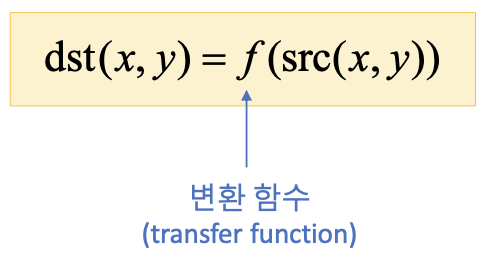

### 영상의 밝기 조절
- 영상을 전체적으로 더욱 밝거나 어둡게 만드는 연산

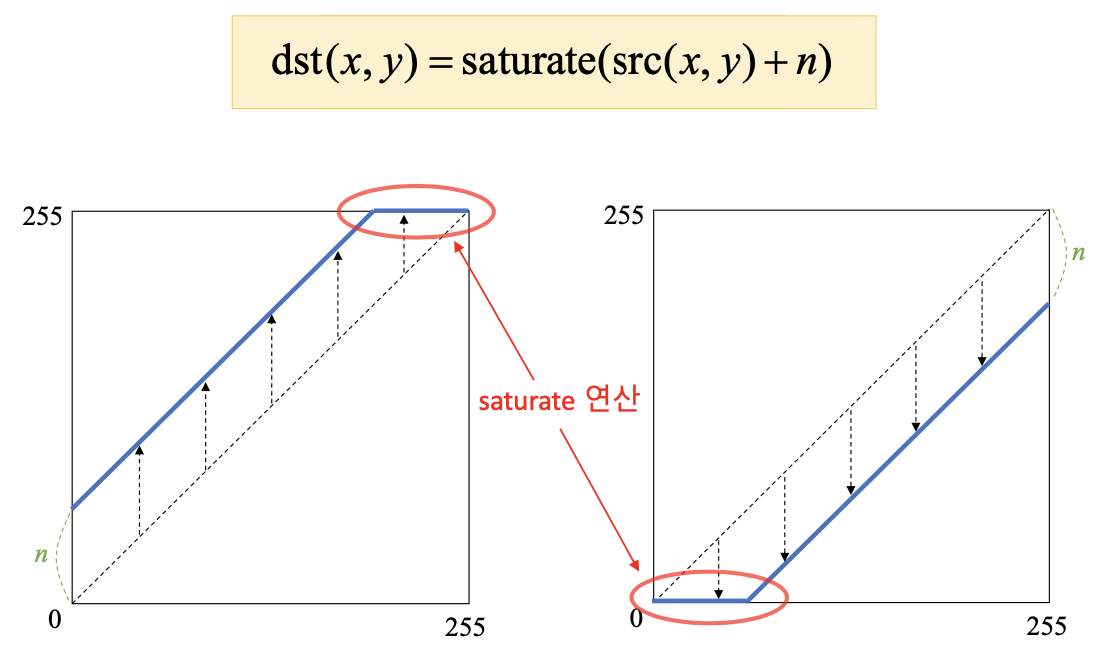

saturate연산
- 출력값이 0보다 작을 때는 0으로 반환하고, 255보다 클 때는 255로 출력

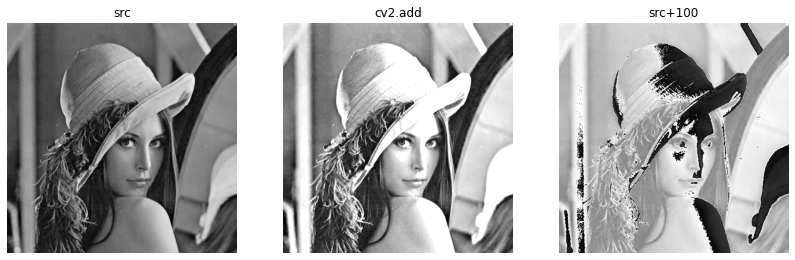

In [ ]:
# 영상의 밝기 조절(덧셈 연산)
# 각 픽셀 값에 덧셈하여 밝기를 조절

src = cv2.imread(gpath + 'ch03/lenna.bmp', cv2.IMREAD_GRAYSCALE) 

dst1 = cv2.add(src, 100)
dst2 = src + 100

# 결과 출력
plt.figure(figsize=(14,10))

plt.subplot(131)
plt.axis('off')
plt.title('src')
plt.imshow(src, cmap='gray')

plt.subplot(132)
plt.axis('off')
plt.title('cv2.add')
plt.imshow(dst1, cmap='gray')

plt.subplot(133)
plt.axis('off')
plt.title('src+100')
plt.imshow(dst2, cmap='gray')

plt.show()

In [ ]:
src[1][-108:-88]

array([173, 178, 187, 189, 195, 194, 196, 199, 202, 202, 200, 200, 203,
       198, 192, 185, 174, 153, 135, 106], dtype=uint8)

In [ ]:
dst1[1][-108:-88]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 253, 235, 206], dtype=uint8)

In [ ]:
dst2[1][-108:-88]

array([ 17,  22,  31,  33,  39,  38,  40,  43,  46,  46,  44,  44,  47,
        42,  36,  29,  18, 253, 235, 206], dtype=uint8)

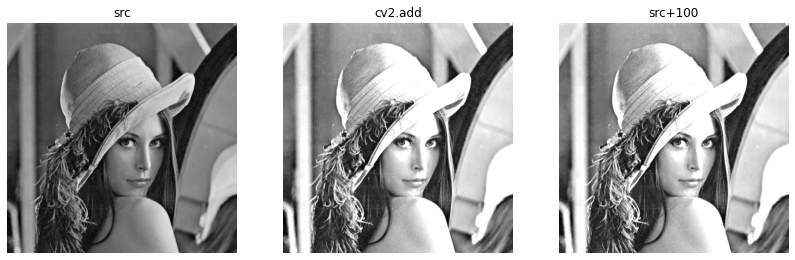

In [ ]:
# np.clip - 값의 범위를 제한

dst2 = np.clip(src + 100., 0, 255).astype(np.uint8)

# 결과 출력
plt.figure(figsize=(14,10))

plt.subplot(131)
plt.axis('off')
plt.title('src')
plt.imshow(src, cmap='gray')

plt.subplot(132)
plt.axis('off')
plt.title('cv2.add')
plt.imshow(dst1, cmap='gray')

plt.subplot(133)
plt.axis('off')
plt.title('src+100')
plt.imshow(dst2, cmap='gray')

plt.show()

### 영상의 산술 연산
- 가중치 합(_cv2.addWeighted_): 같은 위치에 존재하는 픽셀 값에 대하여 가중합 계산
 - 보통 $\alpha$ + $\beta$ = 1로 설정: 두 입력 영상의 평균 밝기를 유지
- 뺄셈 연산(_cv2.subtract_): 같은 위치에 존재하는 픽셀 값에 대하여 뺄셈 연산
 - saturate 연산(결과 0보다 작으면 0으로 설정)
- 차이 연산(_cv2.absdiff_): 같은 위치에 존재하는 픽셀 값에 대하여 뺄셈 연산 후 절대값

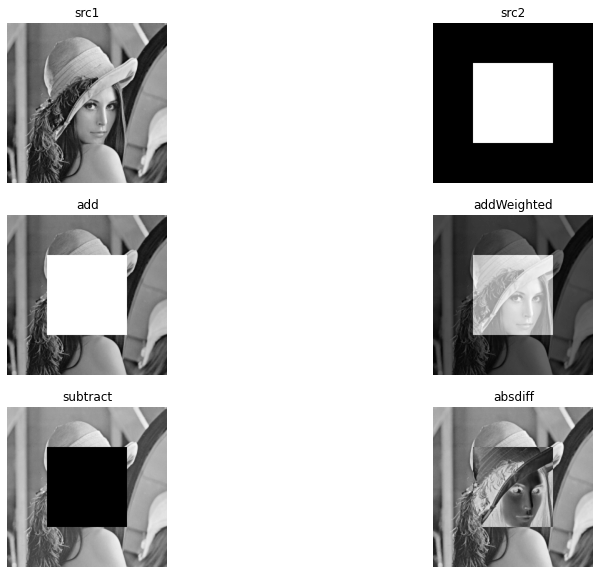

In [ ]:
# 영상 불러오기
src1 = cv2.imread(gpath + 'ch03/lenna256.bmp', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread(gpath + 'ch03/square.bmp', cv2.IMREAD_GRAYSCALE)

# 4가지 연산
dst1 = cv2.add(src1, src2, dtype=cv2.CV_8U)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0.0)
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)

# 영상 출력
plt.figure(figsize=(14,10))

plt.subplot(321), plt.axis('off'), plt.imshow(src1, 'gray'), plt.title('src1')
plt.subplot(322), plt.axis('off'), plt.imshow(src2, 'gray'), plt.title('src2')
plt.subplot(323), plt.axis('off'), plt.imshow(dst1, 'gray'), plt.title('add')
plt.subplot(324), plt.axis('off'), plt.imshow(dst2, 'gray'), plt.title('addWeighted')
plt.subplot(325), plt.axis('off'), plt.imshow(dst3, 'gray'), plt.title('subtract')
plt.subplot(326), plt.axis('off'), plt.imshow(dst4, 'gray'), plt.title('absdiff')

plt.show()

### 컬러 영상과 색 공간
3차원 numpy.ndarray로 표현
- 채널 분리(_cv2.split_)
- 채널 결함(_cv2.merge_)
- 색 공간 변환(_cv2.cvtColor_)
 - 다양한 색 변환 코드 있음(Gray, HSV, YCrCb ...)

src.shape: (480, 640, 3)
src.dtype: uint8


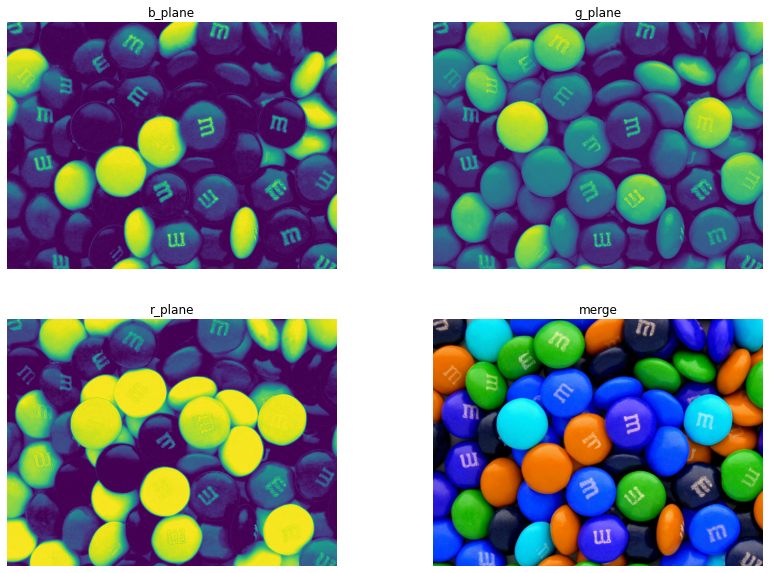

In [ ]:
# 컬러 영상 불러오기
src = cv2.imread(gpath+'ch03/candies.png', cv2.IMREAD_COLOR)

# 컬러 영상 속성 확인
print('src.shape:', src.shape)  # src.shape: (480, 640, 3)
print('src.dtype:', src.dtype)  # src.dtype: unit8

# RGB 색 평면 분할
b_plane, g_plane, r_plane = cv2.split(src)

# 슬라이싱 이용하여 RGB 색 평면 분할
b_plane = src[:, :, 0]
g_plane = src[:, :, 1]
r_plane = src[:, :, 2]

# 색상 채널 결합
src_merge = cv2.merge((b_plane, g_plane, r_plane))

# 결과 출력
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.axis('off')
plt.title('b_plane')
plt.imshow(b_plane)

plt.subplot(222)
plt.axis('off')
plt.title('g_plane')
plt.imshow(g_plane)

plt.subplot(223)
plt.axis('off')
plt.title('r_plane')
plt.imshow(r_plane)

plt.subplot(224)
plt.axis('off')
plt.title('merge')
plt.imshow(src_merge)

plt.show()

### 히스토그램 분석
영상의 픽셀 값 분포를 그래프의 형태로 표현
- <u>"밝은 영상"</u>이면 히스토그램이 전체적으로 오른쪽으로 치우침
- <u>"어두운 영상"</u>이면 히스토그램이 왼쪽으로 치우침
- <u>"명암비가 확실한 영상"</u>이면 히스토그램이 전체적으로 분포

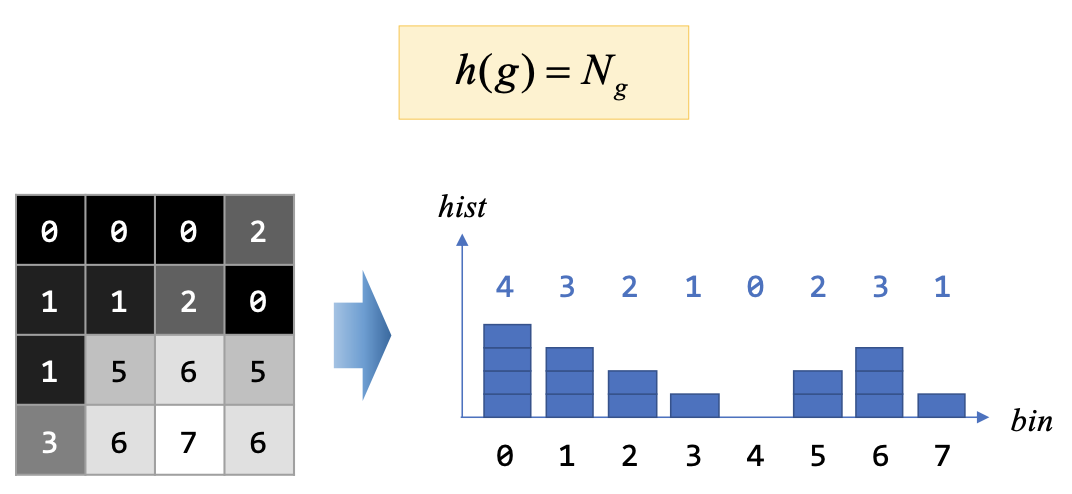

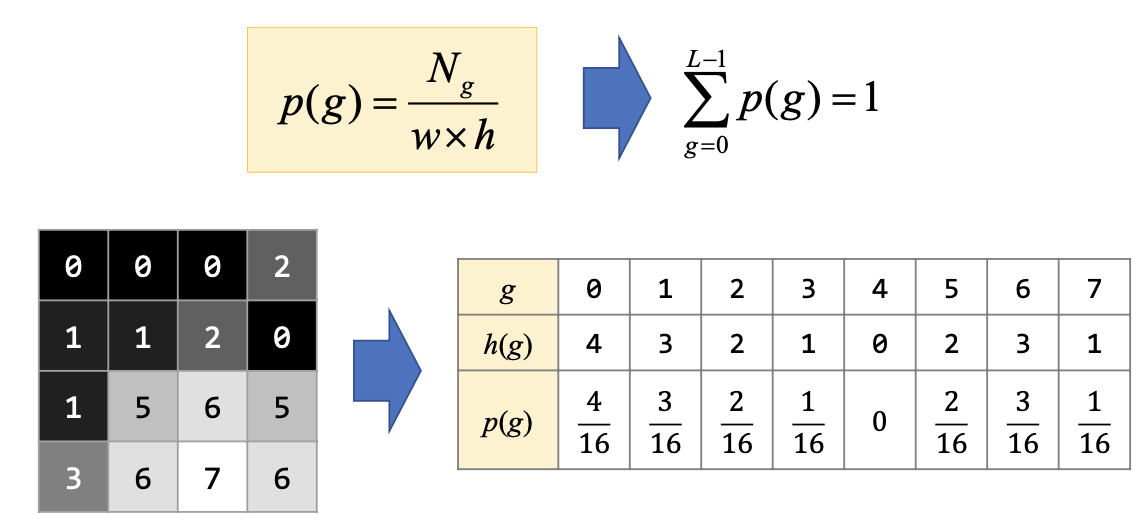

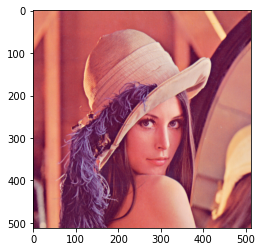

In [ ]:
# 히스토그램 구하는 API: cv2.calcHist()

src = cv2.imread(gpath + 'ch03/lenna.bmp') 
src = cv2.cvtColor(src, cv2.COLOR_RGB2BGR)

plt.imshow(src)
plt.show()

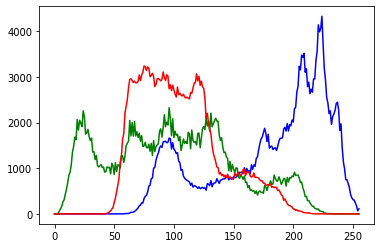

In [ ]:
colors = ['b', 'g', 'r']
bgr_planes = cv2.split(src)

for (p, c) in zip(bgr_planes, colors):
  hist = cv2.calcHist([p], [0], None, [256], [0, 256]) 
  plt.plot(hist, color=c)
plt.show()

### 영상의 명암비 조절
명암비(contrast): 밝은 곳과 어두운 곳 사이에 드러나는 밝기 정도의 차이
- 정규화 함수(_cv2.normalize_)를 통해 명암비 자동 조절

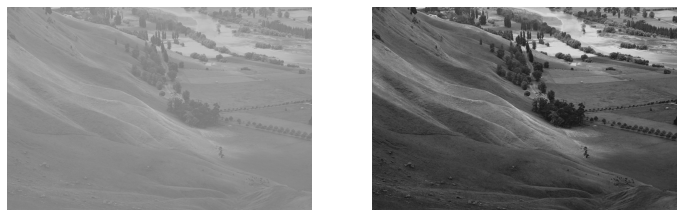

In [ ]:
src = cv2.imread(gpath + 'ch03/Hawkes.jpg') 

dst = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)

# 결과 출력
plt.figure(figsize=(12,8))

plt.subplot(121), plt.axis('off'), plt.imshow(src, cmap='gray')
plt.subplot(122), plt.axis('off'), plt.imshow(dst, cmap='gray')

plt.show()

### 히스토그램 평활화
히스토그램이 전체 구간에서 균일한 분포로 나타나도록 변경하는 명암비 향상 기법
 - 히스토그램 균등화/균일화/평탄화
 - _cv2.equalizeHist_

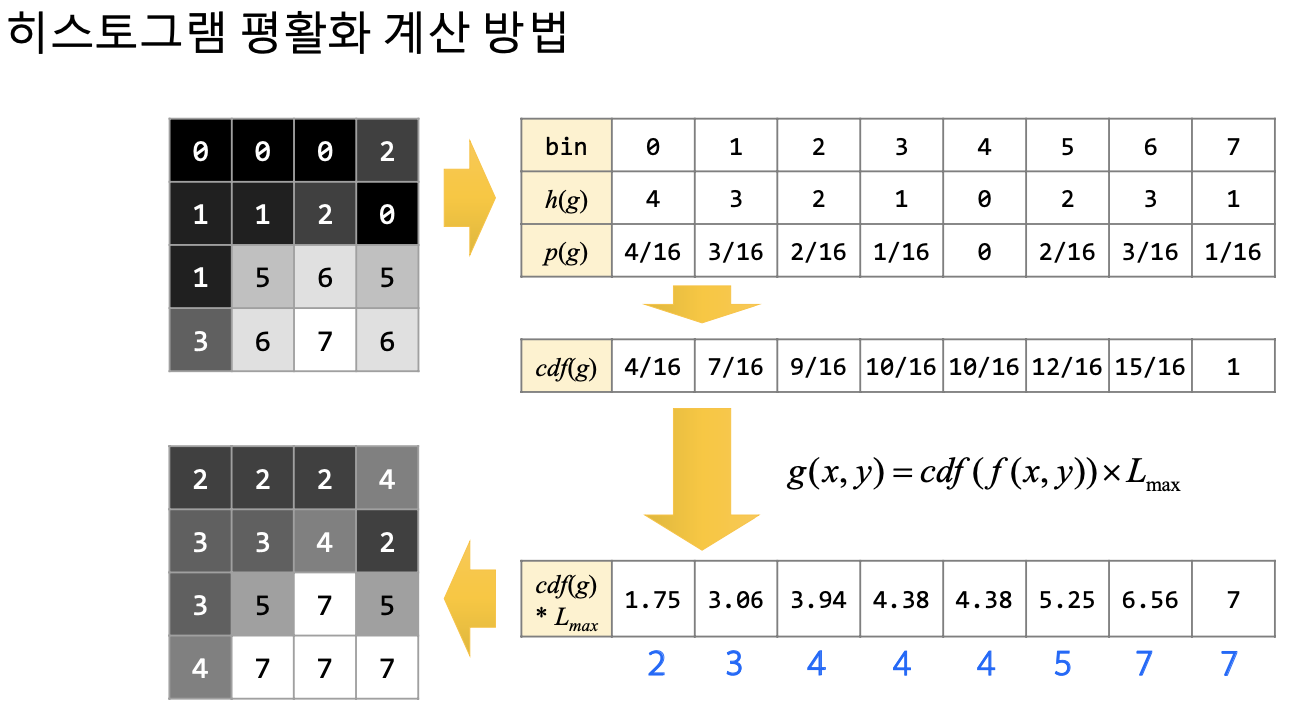

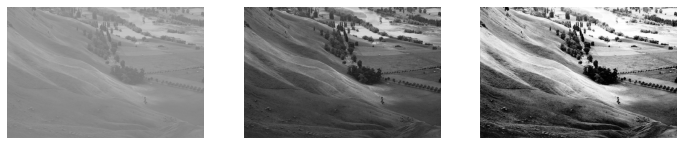

In [ ]:
src_ori = cv2.imread(gpath + 'ch03/Hawkes.jpg')
src = cv2.imread(gpath + 'ch03/Hawkes.jpg', cv2.IMREAD_GRAYSCALE) 

dst1 = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)
dst2 = cv2.equalizeHist(src)

# 결과 출력
plt.figure(figsize=(12,8))

plt.subplot(131), plt.axis('off'), plt.imshow(src_ori, cmap='gray')
plt.subplot(132), plt.axis('off'), plt.imshow(dst1, cmap='gray')
plt.subplot(133), plt.axis('off'), plt.imshow(dst2, cmap='gray')

plt.show()

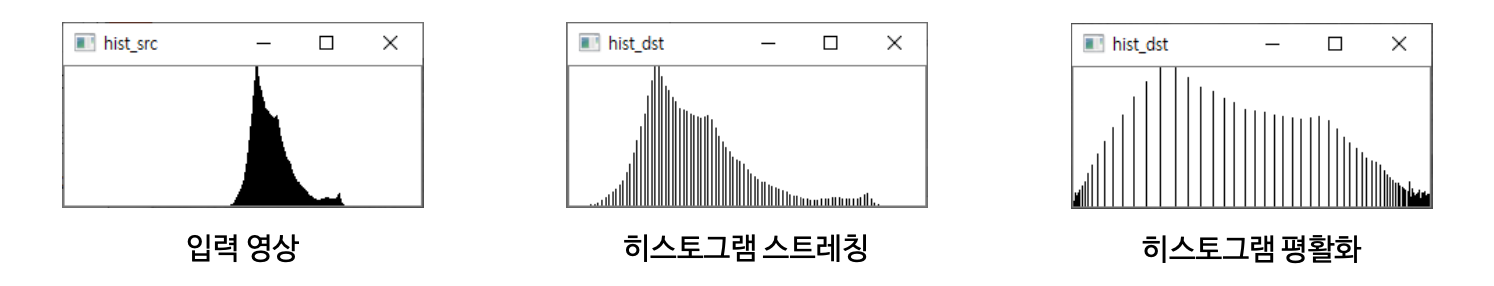

### 특정 색상 영역 추출
특정 색상 영역 추출할 때 HSV 색 공간을 이용
- RGB 색 공간은 어두운 영상은 추출이 잘 안됨
- _cv2.inRange_: 특정 범위 안에 있는 행렬 원소 검출

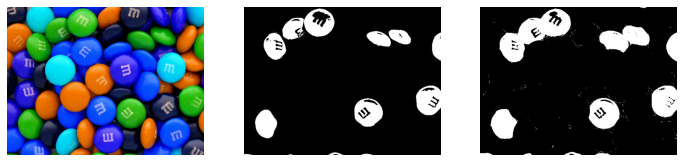

In [ ]:
src = cv2.imread(gpath + 'ch03/candies.png')

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

dst1 = cv2.inRange(src, (0, 128, 0), (100, 255, 100))
dst2 = cv2.inRange(src_hsv, (50, 150, 0), (80, 255, 255))

# 결과 출력
plt.figure(figsize=(12,8))

plt.subplot(131), plt.axis('off'), plt.imshow(src, cmap='gray')
plt.subplot(132), plt.axis('off'), plt.imshow(dst1, cmap='gray')
plt.subplot(133), plt.axis('off'), plt.imshow(dst2, cmap='gray')

plt.show()

### 히스토그램 역투영(_cv2.calcBackProject_)
역투영이란 관심 영역의 히스토그램과 유사한 히스토그램을 갖는 영역을 찾아내는 기법
- 임의의 색상 영역을 검출할 때 효과적
- 역투영을 활용하면 이미지 내에서 특정 물체나 배경을 분리할 수 있음
- (장점) 복잡한 모양의 사물을 분리할 수 있음
- (단점) 히스토그램을 기반으로 관심 영역의 색상과 비슷한 물체를 추출하므로, 관심 영역의 색상과 비슷한 다른 물체가 뒤섞여 있을 때는 효과가 떨어질 수 있음
- 색 공간은 YCrCb사용: 밝기에 상관없이 색을 검출하기 위함

In [ ]:
# CrCb 살색 히스토그램 구하기
ref = cv2.imread(gpath+'ch03/kids1.png', cv2.IMREAD_COLOR)
mask = cv2.imread(gpath+'ch03/kids1_mask.bmp', cv2.IMREAD_GRAYSCALE)
# mask는 포토샵 등의 툴을 통해서 제작

# BGR -> YCrCb 전환
ref_ycrcb = cv2.cvtColor(ref, cv2.COLOR_BGR2YCrCb)

# 히스토그램 생성
channels = [1,2]  # Cr Cb 속성만 이용
ranges = [0, 256, 0, 256]  # Cr, Cb 범위 지정
hist = cv2.calcHist([ref_ycrcb], channels, mask, [128, 128], ranges)  # 히스토그램 생성
hist_norm = cv2.normalize(cv2.log(hist + 1), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

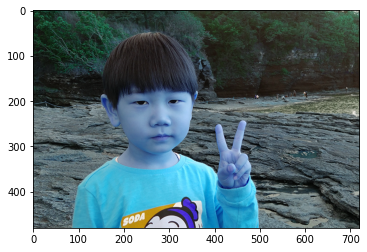

In [ ]:
plt.imshow(ref)
plt.show()

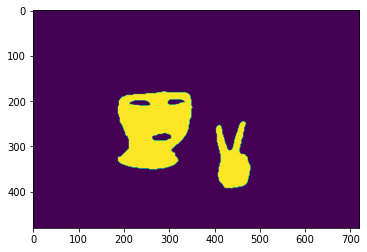

In [ ]:
plt.imshow(mask)
plt.show()

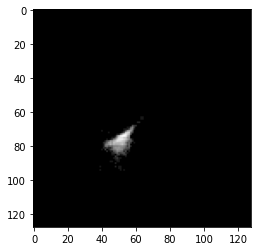

In [ ]:
plt.imshow(hist_norm, cmap='gray')
plt.show()

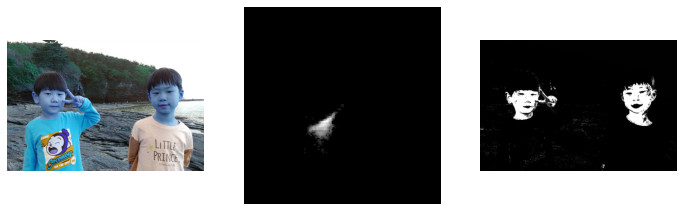

In [ ]:
# 입력 영상에 히스토그램 역투영 적용하기
src = cv2.imread(gpath+'ch03/kids2.png', cv2.IMREAD_COLOR)

# 히스토그램 역투영을 위한 BGR -> YCrCb 전환
src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

# 히스토그램 역투영
backproj = cv2.calcBackProject([src_ycrcb], channels, hist, ranges, 1)

# 결과 출력
plt.figure(figsize=(12,8))

plt.subplot(131), plt.axis('off'), plt.imshow(src, cmap='gray')
plt.subplot(132), plt.axis('off'), plt.imshow(hist_norm, cmap='gray')
plt.subplot(133), plt.axis('off'), plt.imshow(backproj, cmap='gray')

plt.show()


In [ ]:
print('패캠 자료 787p 중 현재까지 {:.2f} % 리뷰 진행'.format(210/787 * 100))

패캠 자료 787p 중 현재까지 26.68 % 리뷰 진행
